## House Prices in Lagos

In [1]:
import numpy as np
import pandas as pd
import re
import os

import matplotlib.pyplot as plt

plt.style.use("fivethirtyeight")
import seaborn as sns

from typing import List

# pandas settings
pd.set_option("max_rows", 800)
pd.set_option("max_colwidth", 200)

# black formattter for notebook
%load_ext lab_black

#### Load and merge all the data
* The data was collected in batches.

In [2]:
data0 = pd.read_csv("data/house_data1.csv")
data0.head()

,title,address,bed,bath,toilet,pkn_space,price
0,4 bedroom detached duplex for sale,"Ikoyi, Lagos",4Bedrooms,4Bathrooms,5Toilets,Save,"225,000,000"
1,5 bedroom detached duplex for sale,"Pinnock Beach Estate, Osapa, Lekki, Lagos",5Bedrooms,5Bathrooms,6Toilets,5Parking Spaces,"400,000,000"
2,4 bedroom semi-detached duplex for sale,"Pinnock Beach Estate, Osapa, Lekki, Lagos",4Bedrooms,4Bathrooms,5Toilets,6Parking Spaces,"190,000,000"
3,5 bedroom detached duplex for sale,"Off Admiralty Road, Lekki Phase 1, Lekki, Lagos",5Bedrooms,5Bathrooms,6Toilets,5Parking Spaces,"310,000,000"
4,5 bedroom detached duplex for sale,"Lekki Phase 1, Lekki, Lagos",5Bedrooms,7Bathrooms,6Toilets,6Parking Spaces,"270,000,000"


In [3]:
data0.shape

(3600, 7)

In [4]:
# load the csv files in the 'data' directory and save it in a list
files = [file for file in os.listdir("data/")]

files

['house_data1.csv',
 'house_data2.csv',
 'house_data3.csv',
 'house_data4.csv',
 'house_data5.csv',
 'house_data6.csv',
 'house_data7.csv']

In [5]:
all_df = pd.DataFrame()  # empty dataframe

print(f"Before concatenatiion: {all_df.shape} \n")

for file in files:
    df = pd.read_csv(f"data/{file}")  # read each file
    all_df = pd.concat([all_df, df], axis="index")  # concatenate each file

print(f"After concatenatiion: {all_df.shape} \n")

Before concatenatiion: (0, 0) 

After concatenatiion: (22698, 7) 



In [6]:
all_df.head()

,title,address,bed,bath,toilet,pkn_space,price
0,4 bedroom detached duplex for sale,"Ikoyi, Lagos",4Bedrooms,4Bathrooms,5Toilets,Save,"225,000,000"
1,5 bedroom detached duplex for sale,"Pinnock Beach Estate, Osapa, Lekki, Lagos",5Bedrooms,5Bathrooms,6Toilets,5Parking Spaces,"400,000,000"
2,4 bedroom semi-detached duplex for sale,"Pinnock Beach Estate, Osapa, Lekki, Lagos",4Bedrooms,4Bathrooms,5Toilets,6Parking Spaces,"190,000,000"
3,5 bedroom detached duplex for sale,"Off Admiralty Road, Lekki Phase 1, Lekki, Lagos",5Bedrooms,5Bathrooms,6Toilets,5Parking Spaces,"310,000,000"
4,5 bedroom detached duplex for sale,"Lekki Phase 1, Lekki, Lagos",5Bedrooms,7Bathrooms,6Toilets,6Parking Spaces,"270,000,000"


### Clean the data.
* reformat the `address` so that it contains only the city name.
* clean the `bed`, `bath`, `toilet`, `pkn_space` and `price` columns.

In [7]:
# adjust pandas display settings
pd.set_option("max_colwidth", 100)

all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22698 entries, 0 to 1475
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   title      22698 non-null  object
 1   address    22698 non-null  object
 2   bed        22457 non-null  object
 3   bath       22698 non-null  object
 4   toilet     20684 non-null  object
 5   pkn_space  19953 non-null  object
 6   price      22698 non-null  object
dtypes: object(7)
memory usage: 1.4+ MB


* The data has some missing values.

In [8]:
## Helper Funcrions


def get_address(addr: str) -> str:
    """
    ====================================================================
        Extract the address.
    """
    result = addr.split(",")[-2:-1]  # select the city
    result = [x.strip() for x in result]  # remove the white spaces
    result = ", ".join(result)  # join on spaces (no longer a list)
    return result


def clean_text(text: str) -> str:
    """
    ====================================================================
        Clean the text and extract the numerical details.
    """
    pattern = r"\D+"  # non-digits
    result = re.sub(pattern, "", text, flags=re.I)
    return result


def extract_details(text: str) -> str:
    """It extracts the details from the description. It returns a string."""
    pattern = (
        r"house|terraced|semi-detached|detached|block of flats|duplex|bungalow|mansion"
    )
    result = re.findall(pattern, text, flags=re.I)
    # convert to a string
    result = " ".join(result)
    return result.title()  # title case

In [9]:
### drop the missing values
all_df1 = all_df.copy()
all_df1 = all_df1.dropna()

In [10]:
# clean the data
for col in all_df1.columns:
    if col == "address":
        all_df1[col] = all_df1[col].apply(get_address)
    elif col == "title":
        all_df1[col] = all_df1[col].apply(extract_details)
    elif col != "title" or col != "address":
        all_df1[col] = all_df1[col].apply(clean_text)

# convert to numeric data type
for col in ["bed", "bath", "toilet", "pkn_space", "price"]:
    all_df1[col] = pd.to_numeric(all_df1[col])


all_df1.head()

,title,address,bed,bath,toilet,pkn_space,price
0,Detached Duplex,Ikoyi,4,4,5,NaN,225000000
1,Detached Duplex,Lekki,5,5,6,5.0,400000000
2,Semi-Detached Duplex,Lekki,4,4,5,6.0,190000000
3,Detached Duplex,Lekki,5,5,6,5.0,310000000
4,Detached Duplex,Lekki,5,7,6,6.0,270000000


In [11]:
all_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19953 entries, 0 to 1474
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      19953 non-null  object 
 1   address    19953 non-null  object 
 2   bed        19953 non-null  int64  
 3   bath       19953 non-null  int64  
 4   toilet     19953 non-null  int64  
 5   pkn_space  13229 non-null  float64
 6   price      19953 non-null  int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 1.2+ MB


In [12]:
# # filter out duplicated records
# all_df1 = all_df1[~all_df1.duplicated()]

# save the data
all_df1.to_csv("all_data.csv", index=False)

<br>

#### Univariate Analysis

In [13]:
# calculate the percentage of missing values
(all_df1.isna().sum() / len(all_df1)).mul(100)

title         0.000000
address       0.000000
bed           0.000000
bath          0.000000
toilet        0.000000
pkn_space    33.699193
price         0.000000
dtype: float64

In [14]:
# descriptive statistics
all_df1.describe()

,bed,bath,toilet,pkn_space,price
count,19953.000000,19953.000000,19953.000000,13229.000000,1.995300e+04
mean,4.304967,5.192753,8.248785,43.278706,3.378717e+08
std,2.182038,23.112368,78.840819,265.541355,1.340157e+10
min,1.000000,1.000000,1.000000,1.000000,9.000000e+04
25%,4.000000,4.000000,5.000000,3.000000,5.500000e+07
50%,4.000000,4.000000,5.000000,4.000000,8.500000e+07
75%,5.000000,5.000000,6.000000,5.000000,1.550000e+08
max,200.000000,1500.000000,7526.000000,19000.000000,1.800000e+12


* The max number of ***bedrooms***, ***bathrooms***, ***toilets***, ***parking space***, and max ***price*** is extremely suspicious. 

<br>

#### Handle Aberrant values.

In [15]:
# list containing the numerical features
num_col = all_df1.select_dtypes(exclude="O").columns.to_list()

In [16]:
all_df2 = all_df1.copy()

# # drop the 'title'
# all_df2.drop(columns=['title'], inplace=True)
# select houses with bedrooms between 2 and 7
all_df2 = all_df2.loc[(all_df2["bed"] > 1) & (all_df2["toilet"] < 8)]

# select houses with bathrooms between 2 and 7
all_df2 = all_df2.loc[(all_df2["bath"] > 1) & (all_df2["bath"] < 8)]

# select houses with pkn_space between 1 and 10
all_df2 = all_df2.loc[(all_df2["pkn_space"] > 2) & (all_df2["pkn_space"] < 11)]

#  outliers for price
cut_off = np.percentile(all_df2["price"], 96)  # remove prices above the 96th percentile
all_df2 = all_df2.loc[all_df2["price"] <= cut_off]

# fill the missing values in 'pkn_space' with the median value
median = all_df2["pkn_space"].median()
all_df2["pkn_space"] = np.where(
    pd.isna(all_df2["pkn_space"]), median, all_df2["pkn_space"]
)

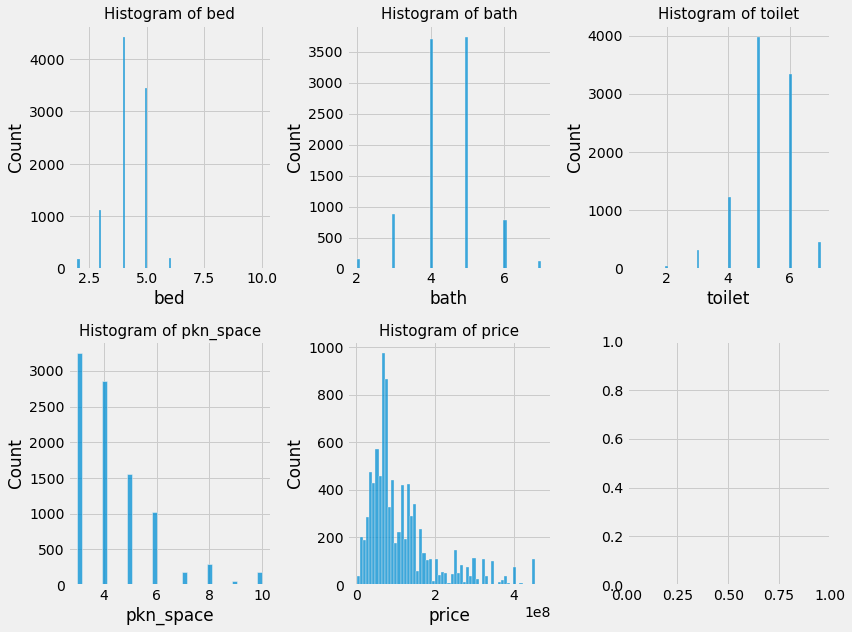

In [17]:
n_rows, n_cols = 2, 3
fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_rows * 6, n_cols * 3))

for idx, col in enumerate(num_col):
    ax = axs[(idx // n_cols), (idx % n_cols)]
    sns.histplot(x=col, data=all_df2, ax=ax)
    ax.set_title(f"Histogram of {col}", size=15)

fig.tight_layout()
plt.show()

* From the distibutions, bed, bath, toilet are all categorical features.
* The target feature (price) is positively skewed. 

In [18]:
# rename column
all_df2 = all_df2.rename(columns={"title": "type"})
all_df2 = all_df2.rename(columns={"address": "location"})

all_df2.head()

,type,location,bed,bath,toilet,pkn_space,price
1,Detached Duplex,Lekki,5,5,6,5.0,400000000
2,Semi-Detached Duplex,Lekki,4,4,5,6.0,190000000
3,Detached Duplex,Lekki,5,5,6,5.0,310000000
4,Detached Duplex,Lekki,5,7,6,6.0,270000000
5,Detached Duplex,Lekki,5,5,6,4.0,270000000


<br>

* Frequency Table

In [19]:
addr_count = pd.crosstab(index=all_df2["location"], columns="Count").apply(
    lambda x: x.sort_values(ascending=False)
)
addr_count.columns = ["Count"]  # rename column
addr_count = addr_count.reset_index()
# select the top 15 locations
addr_count = addr_count[:15]
addr_count

,location,Count
0,Lekki,6172
1,Ajah,1249
2,Ikoyi,344
3,Ikeja,314
4,Ibeju Lekki,274
5,Victoria Island (VI),225
6,Magodo,146
7,Isheri North,108
8,Ikorodu,79
9,Alimosho,67


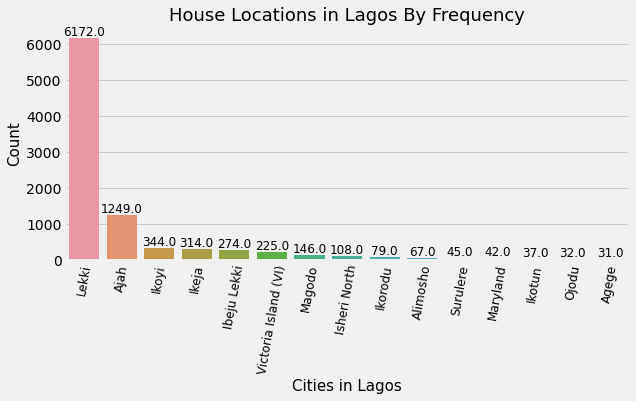

In [20]:
fig, ax = plt.subplots(figsize=(9, 4))

fig = sns.barplot(x="location", y="Count", data=addr_count)
plt.xlabel("Cities in Lagos", size=15)
plt.tick_params(axis="x", labelsize=12, labelrotation=80)
plt.ylabel("Count", size=15)
plt.title("House Locations in Lagos By Frequency", size=18)

for bar in ax.patches:
    x = bar.get_x() + bar.get_width() / 2
    y = bar.get_height()
    ax.annotate(
        text=y,  # text pos
        xy=(x, y),  # (x, y)
        xytext=(0, 6),  # text position
        ha="center",  # horizontal alignment
        va="center",  # vertical alignment
        size=12,  # text size
        textcoords="offset points",
    )  # text coordinates???

plt.show()

In [21]:
locations = [*addr_count["location"].values]

# Filter out locations with fewer counts
all_df2 = all_df2.loc[all_df2["location"].isin(locations)]

<br>

#### Multivariate Analysis
* Frequency Table

In [22]:
grpby_bed = (
    all_df2.groupby(["bed"])[["price"]]
    .agg(["median"])
    .apply(lambda x: x.sort_values(ascending=False))
)
grpby_bed.columns = ["Price(median)"]

grpby_bed

,Price(median)
bed,
9,200000000
7,187500000
6,160000000
5,140000000
4,75000000
3,36000000
10,35000000
8,35000000
2,33500000


In [23]:
grpby_bath = (
    all_df2.groupby(["bath"])[["price"]]
    .agg(["median"])
    .apply(lambda x: x.sort_values(ascending=False))
)
grpby_bath.columns = ["Price(median)"]

grpby_bath

,Price(median)
bath,
7,155000000
6,140000000
5,130000000
4,72000000
3,35000000
2,33500000


In [24]:
# groupby locations
grby = pd.crosstab(
    index=all_df2["location"],
    columns=["avg_price (NGN)"],
    values=all_df2["price"],
    aggfunc=np.median,
).apply(lambda x: x.sort_values(ascending=False))
grby.columns = ["avg_price (NGN)"]
grby

,avg_price (NGN)
location,
Ikoyi,270000000
Victoria Island (VI),150000000
Magodo,135000000
Ikeja,130000000
Lekki,95000000
Maryland,80000000
Isheri North,75000000
Surulere,65000000
Ajah,55000000


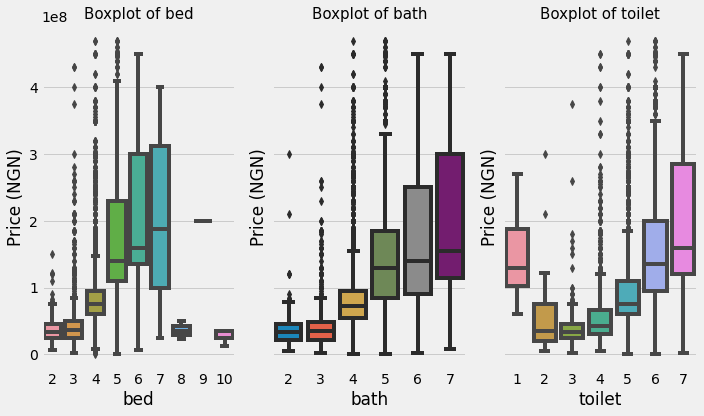

In [25]:
# Boxplot of Features vs Target
n_rows, n_cols = 1, 3
fig, axs = plt.subplots(n_rows, n_cols, sharey=True, figsize=(10, 6))


for idx, col in enumerate(["bed", "bath", "toilet"]):
    ax = axs[idx]
    sns.boxplot(x=col, y="price", data=all_df2, ax=ax)
    ax.set_ylabel("Price (NGN)")
    ax.set_title(f"Boxplot of {col}", size=15)

fig.tight_layout()
plt.show()

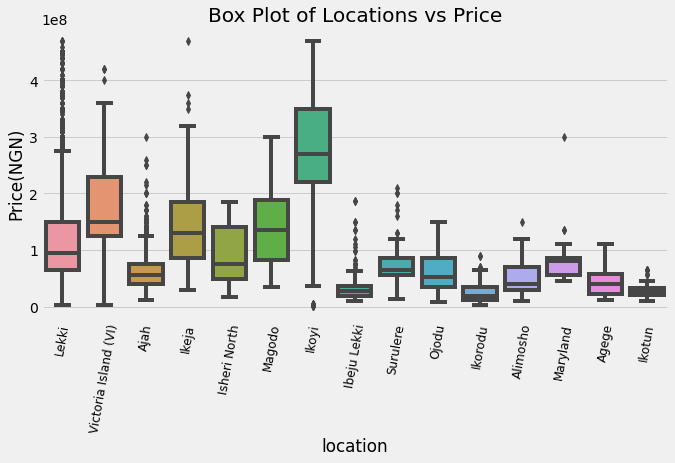

In [26]:
# Box Plot of Locations vs Price

plt.figure(figsize=(10, 5))
sns.boxplot(x="location", y="price", data=all_df2)
plt.tick_params(axis="x", labelsize=12, labelrotation=80)
plt.ylabel("Price(NGN)")
plt.title("Box Plot of Locations vs Price")

plt.show()

* There are still outliers in the data but it's fine.
* Generally, it appears that as the facilities in a house increases, the median price also increases which sounds logical.
* It also appears that the price of houses vary based on the location.
* Houses in Ikoyi and VI are really pricey!

In [27]:
# count of the type
all_df2["type"].value_counts()

Detached Duplex           4243
Semi-Detached Duplex      2205
Terraced Duplex           1655
Detached Bungalow          340
House                      324
Block Of Flats             306
Semi-Detached Bungalow      81
Terraced Bungalow           11
Name: type, dtype: int64

### Model Building

In [28]:
# Preprocess the features
from sklearn.preprocessing import LabelEncoder

* 'Before Encoding'

In [29]:
all_df2.head(3)

,type,location,bed,bath,toilet,pkn_space,price
1,Detached Duplex,Lekki,5,5,6,5.0,400000000
2,Semi-Detached Duplex,Lekki,4,4,5,6.0,190000000
3,Detached Duplex,Lekki,5,5,6,5.0,310000000


* 'After Encoding'

In [30]:
all_df3 = all_df2.copy()

# encode the title and address
le_type = LabelEncoder()
le_location = LabelEncoder()
all_df3["type"] = le_type.fit_transform(all_df3["type"])
all_df3["location"] = le_location.fit_transform(all_df3["location"])

all_df3.head(3)

,type,location,bed,bath,toilet,pkn_space,price
1,2,9,5,5,6,5.0,400000000
2,5,9,4,4,5,6.0,190000000
3,2,9,5,5,6,5.0,310000000


* Transform the price.

In [31]:
# transform the price
all_df3["log_price"] = all_df3["price"].apply(lambda price: np.log(price + 1))

# drop the 'price'
all_df3 = all_df3.drop(columns=["price"])

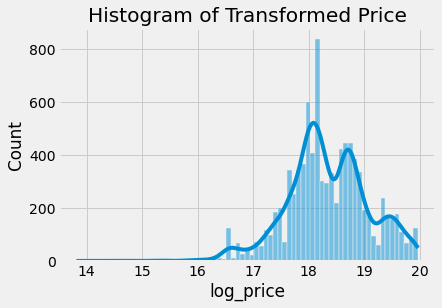

In [32]:
sns.histplot(x="log_price", data=all_df3, kde=True)
plt.title("Histogram of Transformed Price")

plt.show()

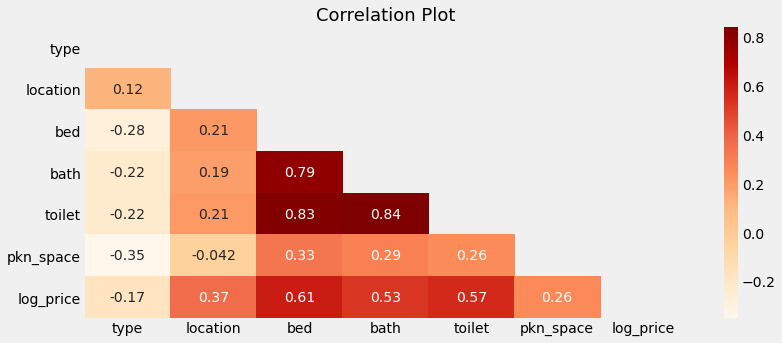

In [33]:
### Correlation Plot
plt.figure(figsize=(12, 5))

corr_matrix = all_df3.corr()
mask = np.triu(corr_matrix)
sns.heatmap(data=corr_matrix, mask=mask, annot=True, cmap="OrRd")
plt.title("Correlation Plot", size=18)

plt.show()

<br>

* Build models.

In [34]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR

In [35]:
X = all_df3.drop(columns=["log_price"])
y = all_df3["log_price"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=123
)

In [36]:
models = {
    "lin_model": LinearRegression(),
    "ridge_model": Ridge(random_state=123),
    "rf_model": RandomForestRegressor(random_state=123),
    "ada_boost": AdaBoostRegressor(random_state=123),
    "svr": SVR(),
}

In [37]:
def train_model(models: dict) -> pd.DataFrame:
    """
    ============================================================================
    It takes in a dictionary containing a key-pair of model name and estimators.
    It returns a data frame containing the metrics of the trained model.
    """
    my_dict = {}
    name_list, r_sqd_list, mae_list, rmse_list = [], [], [], []
    for name, estimator in models.items():
        # fit
        estimator.fit(X_train, y_train)

        # make predictions
        y_pred = estimator.predict(X_test)

        # metrics
        r_sqd = metrics.r2_score(y_test, y_pred)
        mae = metrics.mean_absolute_error(y_test, y_pred)
        mse = metrics.mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)

        # add the metrics to the empty list
        name_list.append(name)
        r_sqd_list.append(r_sqd)
        mae_list.append(mae)
        rmse_list.append(rmse)

    my_dict["Name"] = name_list
    my_dict["R_squared"] = r_sqd_list
    my_dict["Mean_absolute_error"] = mae_list
    my_dict["Root_mean_sqd_error"] = rmse_list

    my_df = pd.DataFrame(my_dict)
    my_df = my_df.sort_values("Root_mean_sqd_error")
    return my_df

In [38]:
train_model(models)

,Name,R_squared,Mean_absolute_error,Root_mean_sqd_error
2,rf_model,0.640865,0.312220,0.454429
4,svr,0.579200,0.348260,0.491898
0,lin_model,0.472303,0.410295,0.550846
1,ridge_model,0.472293,0.410301,0.550851
3,ada_boost,0.408157,0.434764,0.583366


### Tune The Model

In [39]:
rf = RandomForestRegressor(random_state=123)
rf_params = dict(
    n_estimators=np.arange(80, 162, 10), max_depth=[10, 12, 14, 16, 18, None]
)
gs_rf = GridSearchCV(rf, rf_params, n_jobs=-1, scoring="neg_root_mean_squared_error")

# fit the model
gs_rf.fit(X_train, y_train)

gs_rf.best_params_

{'max_depth': 12, 'n_estimators': 90}

In [40]:
model = {
    "rf_model": RandomForestRegressor(max_depth=12, n_estimators=90, random_state=123),
}
train_model(model)

,Name,R_squared,Mean_absolute_error,Root_mean_sqd_error
0,rf_model,0.645583,0.310802,0.451434


In [41]:
# train the model with the optimal hyperparameters
reg = RandomForestRegressor(max_depth=12, n_estimators=90, random_state=123)
# fit
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

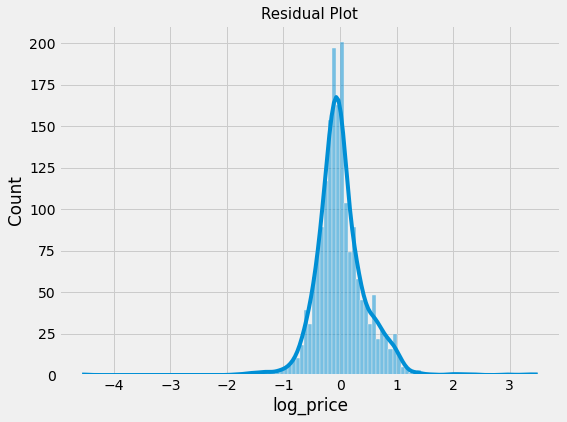

In [42]:
# Residual plot
residual = y_test - y_pred

plt.figure(figsize=(8, 6))
sns.histplot(residual, kde=True)
plt.title("Residual Plot", size=15)

plt.show()

* The residual plot follows a fairly Normal Distribution.
<br>

<hr>


In [43]:
# Feature importance
feat_imp = pd.Series(data=reg.feature_importances_, index=X.columns)
feat_imp = feat_imp.sort_values(ascending=False).reset_index()
feat_imp.columns = ["Features", "Weights"]
feat_imp

,Features,Weights
0,bed,0.541451
1,location,0.267847
2,type,0.094237
3,pkn_space,0.057231
4,bath,0.020610
5,toilet,0.018625


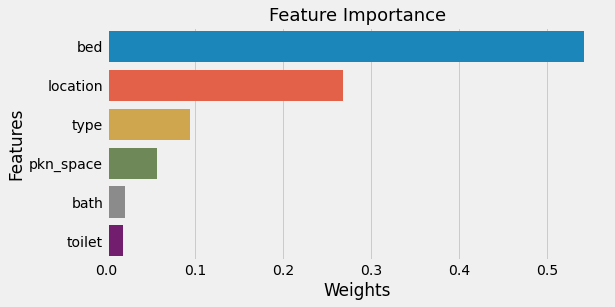

In [44]:
plt.figure(figsize=(8, 4))
sns.barplot(y="Features", x="Weights", data=feat_imp)
plt.title("Feature Importance", size=18)

plt.show()

### Make Predictions on new data.

In [45]:
all_df2.sample(5, random_state=123)

,type,location,bed,bath,toilet,pkn_space,price
2224,Terraced Duplex,Lekki,3,4,4,8.0,34000000
2284,Semi-Detached Duplex,Lekki,4,5,5,6.0,67000000
2396,Detached Duplex,Ajah,3,4,5,6.0,38000000
1880,Detached Duplex,Lekki,5,6,6,4.0,110000000
2784,Semi-Detached Duplex,Lekki,4,4,5,3.0,60000000


In [46]:
# type, address, bed, bath, toilet, pkn_space
new_data = [["Semi-Detached Duplex", "Lekki", 5, 5, 6, 4]]
# convert to array
new_data = np.array(new_data)
new_data

array([['Semi-Detached Duplex', 'Lekki', '5', '5', '6', '4']],
      dtype='<U20')

In [47]:
# encode the title
new_data[:, 0] = le_type.transform(new_data[:, 0])
# encode the location
new_data[:, 1] = le_location.transform(new_data[:, 1])
new_data

array([['5', '9', '5', '5', '6', '4']], dtype='<U20')

In [48]:
# make predictions
price = reg.predict(new_data)
# convert the price from log_price to actual price
act_price = np.exp(price) + 1
act_price = round(act_price[0])  # round to the neaarest Naira

print(f"The estimated cost of the property is NGN {act_price:,}")

The estimated cost of the property is NGN 111,892,670


### Save the model

In [49]:
import pickle

model = {}
model["reg"] = reg
model["type"] = le_type
model["location"] = le_location

with open("./model/estimator.pkl", "wb") as f:
    pickle.dump(model, f)

#### Load the model

In [50]:
# load the model
with open("./model/estimator.pkl", "rb") as f:
    loaded_model = pickle.load(f)

In [51]:
rf_reg = loaded_model["reg"]  # regressor
le_type = loaded_model["type"]  # type label encoder
le_location = loaded_model["location"]  # location label encoder

In [52]:
# type, address, bed, bath, toilet, pkn_space
new_data = [["Semi-Detached Duplex", "Lekki", 5, 5, 6, 4]]
# convert to array
new_data = np.array(new_data)
# encode the title
new_data[:, 0] = le_type.transform(new_data[:, 0])
# encode the location
new_data[:, 1] = le_location.transform(new_data[:, 1])

# make predictions
price = rf_reg.predict(new_data)
# convert the price from log_price to actual price
act_price = np.exp(price) + 1
act_price = round(act_price[0])  # round to the neaarest Naira

print(f"The estimated cost of the property is NGN {act_price:,}")

The estimated cost of the property is NGN 111,892,670
